In [1]:
import numpy as np

from keras.datasets import cifar10

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0


50000 train samples
10000 test samples


In [4]:
def show_cifar10_images(dataset):
    fig = plt.figure(figsize=(9, 15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                        wspace=0.05)
    for i in range(81):
        ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
        ax.imshow(dataset[i])

In [5]:
def random_erasing(img, p = 0.5, s_l = 0.02, s_h = 0.4, r1 = 0.3, r2 = 1. / 0.3):
    p1 = np.random.uniform(0,1)
    if p1 < p:
        return img
    else:
        H = img.shape[0]
        W = img.shape[1]
        S = H * W
        while True:
            S_e = S * np.random.uniform(low=s_l, high=s_h)
            r_e = np.random.uniform(low=r1, high=r2)

            H_e = np.sqrt(S_e * r_e)
            W_e = np.sqrt(S_e / r_e)

            x_e = np.random.randint(0, W)
            y_e = np.random.randint(0, H)

            if x_e + W_e <= W and y_e + H_e <= H:
                img_erased = np.copy(img)
                img_erased[y_e:int(y_e + H_e + 1), x_e:int(x_e + W_e + 1), :] = np.random.uniform(0, 1)
                return img_erased

In [6]:
x_train_erased = np.copy(x_train)
x_train_erased.shape

(50000, 32, 32, 3)

In [7]:
for i in range(x_train_erased.shape[0]):
    x_train_erased[i] = random_erasing(x_train_erased[i])

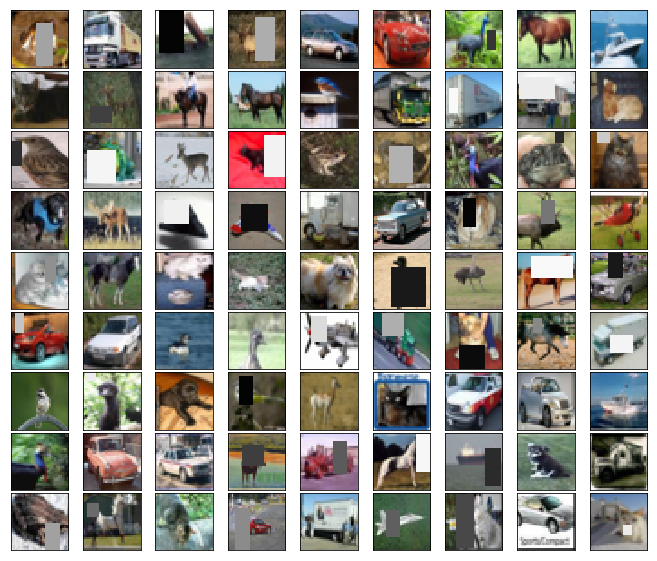

In [8]:
show_cifar10_images(x_train_erased)